In [1]:
import pandas as pd
import datetime

all_o3_df = pd.read_csv("./Resources/all_years_o3.csv")
#turn date column elements into datetime objects
all_o3_df["Date"] = pd.to_datetime(all_o3_df["Date"])
all_o3_df = all_o3_df.set_index("Date")

all_pm25_df = pd.read_csv("./Resources/all_years_pm25.csv")
#turn date column elements into datetime objects
all_pm25_df["Date"] = pd.to_datetime(all_pm25_df["Date"])
all_pm25_df = all_pm25_df.set_index("Date")
all_pm25_df.head()

,Country,City,Specie,count,min (ug/m3),max (ug/m3),median (ug/m3)
Date,,,,,,,
2017-01-01,IN,New Delhi,pm25,24,54.9,282.7,177.7
2017-01-01,CN,Shanghai,pm25,215,12.0,63.2,34.4
2017-01-01,US,Jacksonville,pm25,115,3.1,113.6,8.1
2017-01-01,US,Los Angeles,pm25,69,3.3,109.7,15.9
2017-01-01,US,Manhattan,pm25,96,4.3,23.0,12.1


In [2]:
#inputs for the function are the complete dataframe for one particulate (df), the city name (city), an integer tuple in the 
#form of (month, day) for the shutdown date (shutdown_date, for example (1, 23) for 1/23) - NOTE that this is the 
#date where the strictest lockdown regulations start for that city, and an integer tuple in the 
#form of (month, day) for the reopen date (reopen_date, for example (4, 8) for 4/8) - NOTE that this is the date when the city 
#begins to reopen from the strictest lockdown regulations
#
#returns a dataframe with the correct shutdown date ranges for all years in the data set
def shutdownData(df, city, shutdown_date, reopen_date):

    mask = ((pd.Series(map(lambda x: x.month <= shutdown_date[0], df.index.date), index=df.index)) &
                                                ((pd.Series(map(lambda x: x.day < shutdown_date[1], df.index.date), index=df.index))))
    #first get dates after the start date for all years
    shutdown_time_period_df = df.loc[~mask, :]

    #remove the later months
    shutdown_time_period_df = shutdown_time_period_df.loc[shutdown_time_period_df.index.month<=reopen_date[0]]

    #now get dates before the end date
    mask2 = ((pd.Series(map(lambda x: x.month == reopen_date[0], shutdown_time_period_df.index.date), index=shutdown_time_period_df.index)) &
                                                ((pd.Series(map(lambda x: x.day >= reopen_date[1], shutdown_time_period_df.index.date), index=shutdown_time_period_df.index))))

    shutdown_time_period_df = shutdown_time_period_df.loc[~mask2, :]

    shutdown_time_period_df = shutdown_time_period_df.loc[shutdown_time_period_df["City"] == city]
    
    return shutdown_time_period_df

shutdown_time_period_pm_df = shutdownData(all_pm25_df, "Wuhan", (1, 23), (4, 8))

#print("The 'shutdownData' function is working correctly:", test_df.equals(shutdown_time_period_pm_df))

In [3]:
#so to get the ozone information for Wuhan between the shutdown date of 1/23 and the reopening date of 4/8, we 
#need to call the function as follows:
wuhan_o3_shutdown_df = shutdownData(all_o3_df, "Wuhan", (1, 23), (4, 8))
wuhan_o3_shutdown_df

,Country,City,Specie,count,min (ppb),max (ppb),median (ppb)
Date,,,,,,,
2017-01-23,CN,Wuhan,o3,347,0.0,50.0,18.0
2017-01-24,CN,Wuhan,o3,380,2.0,49.0,23.0
2017-01-25,CN,Wuhan,o3,399,0.0,57.0,17.0
2017-01-26,CN,Wuhan,o3,400,0.0,55.0,18.0
2017-01-27,CN,Wuhan,o3,360,0.0,43.0,25.0
...,...,...,...,...,...,...,...
2020-04-03,CN,Wuhan,o3,387,15.0,58.0,35.0
2020-04-04,CN,Wuhan,o3,386,2.0,63.0,35.0
2020-04-05,CN,Wuhan,o3,384,7.0,66.0,47.0


In [4]:
#get average of medians by year
bar_plot_info = shutdown_time_period_pm_df.groupby(shutdown_time_period_pm_df.index.year).mean()
bar_plot_info

,count,min (ug/m3),max (ug/m3),median (ug/m3)
Date,,,,
2017,392.773333,31.604000,146.686763,67.894667
2018,386.400000,21.257333,152.695591,52.801333
2019,376.148649,19.433784,125.733971,54.258108
2020,378.184211,14.336842,77.788158,35.568421


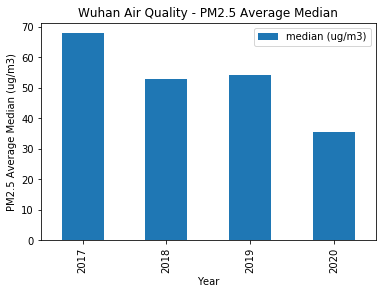

In [5]:
#plot of average medians
bar_plot_axes = bar_plot_info.plot(kind="bar", y="median (ug/m3)")

#set titles, axes labels
bar_plot_axes.set_title("Wuhan Air Quality - PM2.5 Average Median")
bar_plot_axes.set_ylabel("PM2.5 Average Median (ug/m3)")
bar_plot_axes.set_xlabel("Year")

bar_plot_axes.get_figure().savefig("./outputs/Wuhan/Wuhan_pm25median.png")

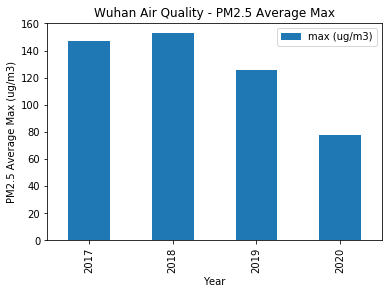

In [6]:
#plot of average maximums
bar_plot_2_axes = bar_plot_info.plot(kind="bar", y="max (ug/m3)")

#set titles, axes labels
bar_plot_2_axes.set_title("Wuhan Air Quality - PM2.5 Average Max")
bar_plot_2_axes.set_ylabel("PM2.5 Average Max (ug/m3)")
bar_plot_2_axes.set_xlabel("Year")

bar_plot_2_axes.get_figure().savefig("./outputs/Wuhan/Wuhan_pm25max.png")

In [7]:
#get percentage decrease year over year
bar_plot_info.pct_change()

,count,min (ug/m3),max (ug/m3),median (ug/m3)
Date,,,,
2017,NaN,NaN,NaN,NaN
2018,-0.016226,-0.327385,0.040964,-0.222305
2019,-0.026530,-0.085784,-0.176571,0.027590
2020,0.005412,-0.262272,-0.381327,-0.344459


In [8]:
#combine three previous years into an average median value
prior_years_df = bar_plot_info.loc[bar_plot_info.index<2020]
prior_averages = prior_years_df.mean()
prior_averages

count             385.107327
min (ug/m3)        24.098372
max (ug/m3)       141.705442
median (ug/m3)     58.318036
dtype: float64

,average median during shutdown dates (ug/m3)
Prior Years,NaN
2020,-0.390096


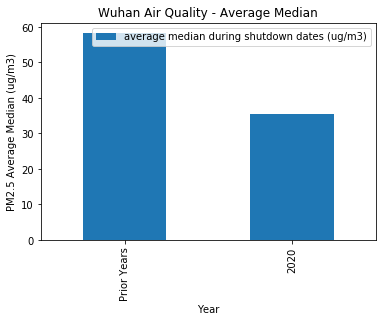

In [9]:
summary_bar_plot = pd.DataFrame({"average median during shutdown dates (ug/m3)":[prior_averages["median (ug/m3)"], 
                                                                                 bar_plot_info["median (ug/m3)"][2020]]}, 
                                index=["Prior Years", "2020"])

summary_axes = summary_bar_plot.plot(kind="bar")
summary_bar_plot.pct_change()

#set titles, axes labels
summary_axes.set_title("Wuhan Air Quality - Average Median")
summary_axes.set_ylabel("PM2.5 Average Median (ug/m3)")
summary_axes.set_xlabel("Year")

summary_axes.get_figure().savefig("./outputs/Wuhan/Wuhan_3yearmedianchange.png")
summary_bar_plot.pct_change()

In [10]:
#look at o3 values for wuhan for the same time period by year
wuhan_avg_o3_df = wuhan_o3_shutdown_df.groupby(wuhan_o3_shutdown_df.index.year).mean()
wuhan_avg_o3_df

,count,min (ppb),max (ppb),median (ppb)
Date,,,,
2017,369.466667,0.893333,48.360000,18.493333
2018,379.866667,1.626667,53.813333,18.800000
2019,366.931507,1.328767,51.671233,17.068493
2020,378.894737,5.921053,47.381579,26.618421


In [11]:
#combine three previous years into an average median value
prior_years_o3_df = wuhan_avg_o3_df.loc[wuhan_avg_o3_df.index<2020]
prior_o3_averages = prior_years_o3_df.mean()
prior_o3_averages

count           372.088280
min (ppb)         1.282922
max (ppb)        51.281522
median (ppb)     18.120609
dtype: float64

,average median during shutdown dates (ppb)
Prior Years,NaN
2020,0.468958


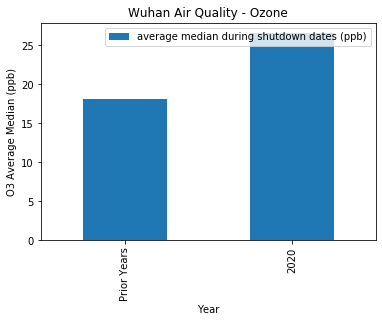

In [12]:
summary_bar_plot = pd.DataFrame({"average median during shutdown dates (ppb)":[prior_o3_averages["median (ppb)"], 
                                                                                 wuhan_avg_o3_df["median (ppb)"][2020]]}, 
                                index=["Prior Years", "2020"])

o3_axes = summary_bar_plot.plot(kind="bar")

#set titles, axes labels
o3_axes.set_title("Wuhan Air Quality - Ozone")
o3_axes.set_ylabel("O3 Average Median (ppb)")
o3_axes.set_xlabel("Year")

o3_axes.get_figure().savefig("./outputs/Wuhan/Wuhan_3yearmedianchange_o3.png")


summary_bar_plot.pct_change()

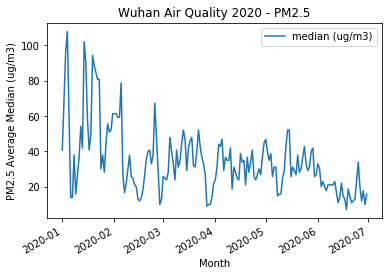

In [20]:
import matplotlib.pyplot as plt
line_plot, line_axes = plt.subplots()

wuhan_2020_pm25_df = all_pm25_df.loc[(all_pm25_df.index.year == 2020) & (all_pm25_df["City"] == "Wuhan")]
Wuhan_line_axes = wuhan_2020_pm25_df.plot(kind="line", y="median (ug/m3)", ax=line_axes)

#set titles, axes labels
Wuhan_line_axes.set_title("Wuhan Air Quality 2020 - PM2.5")
Wuhan_line_axes.set_ylabel("PM2.5 Average Median (ug/m3)")
Wuhan_line_axes.set_xlabel("Month")

Wuhan_line_axes.get_figure().savefig("./outputs/Wuhan/Wuhan_2020_line_plot.png")

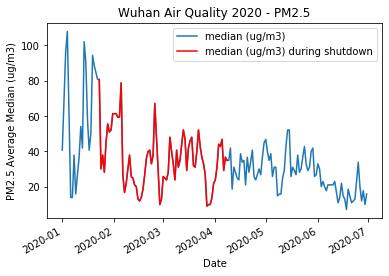

In [21]:
#look at wuhan durin shutdown - red part of line graph
Wuhan_2020_shutdown = wuhan_2020_pm25_df["1/23/20":"4/8/20"]
Wuhan_2020_shutdown.plot(y="median (ug/m3)", style="r", ax=line_axes)
line_axes.legend(["median (ug/m3)", "median (ug/m3) during shutdown"])
line_plot

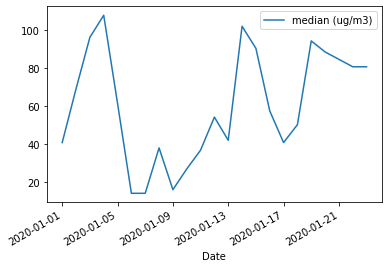

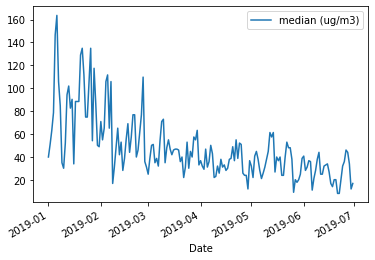

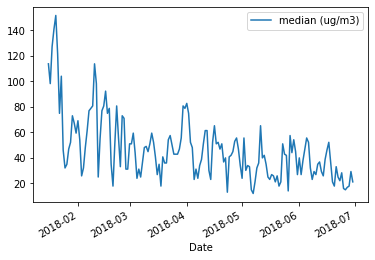

In [15]:
#examine earlier years (2018, 2019) during first 6 months to see if seasonal effects like cold weather in winter 
#could contribute to wood burning fires that reduce air quality

wuhan_line_axes_2 = wuhan_2020_pm25_df["1/1/20":"1/23/20"].plot(kind="line", y="median (ug/m3)")
wuhan_2019_pm25_df = all_pm25_df.loc[(all_pm25_df.index.year == 2019) & (all_pm25_df["City"] == "Wuhan")]
wuhan_line_axes_3 = wuhan_2019_pm25_df.plot(kind="line", y="median (ug/m3)")
wuhan_2018_pm25_df = all_pm25_df.loc[(all_pm25_df.index.year == 2018) & (all_pm25_df["City"] == "Wuhan")]
wuhan_2018_pm25_df.plot(kind="line", y="median (ug/m3)")